# Calibration from Kendrick series


This notebook shows how to proceed the following steps:

1. Read a mass spectrum file
2. Build iteratively a calibration list using kendrick series
3. Proceed to the attribution
4. (optional) export the calibration list

### Load python modules

In [1]:
from pyc2mc.io.peaklist import read_peaklist
from pyc2mc.core.formula_grid import FormulaGrid
from pyc2mc.processing.caliblist_builder import CalibListBuilder
from pyc2mc.processing.recalibration import Recalibration, WalkingCalibration
from pyc2mc.processing.attribution import lowest_error_attribution

## Load Data

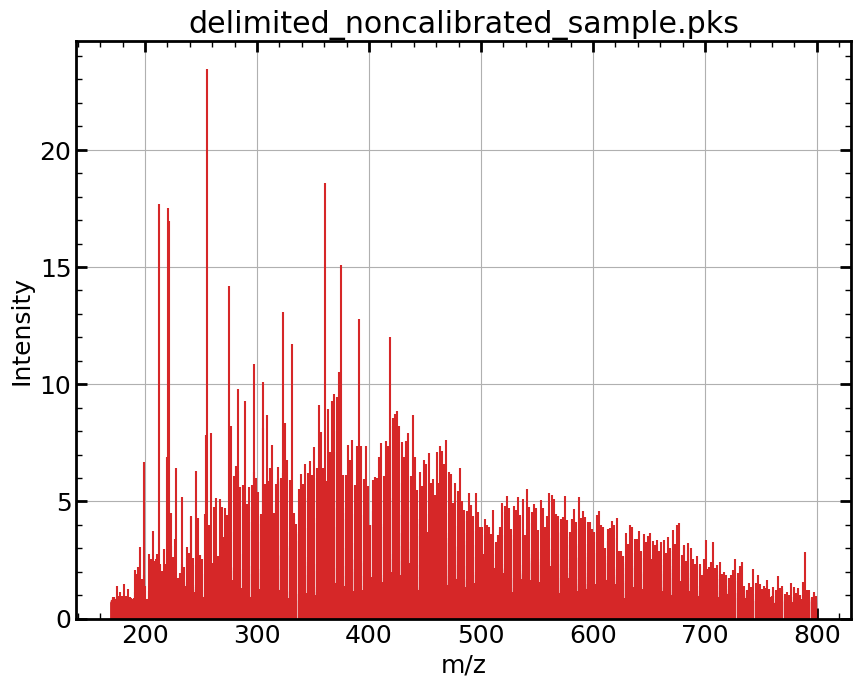

In [2]:
pl = read_peaklist("data/noncalibrated_sample.pks")
pl = pl.delimit(mz_bounds=(170, 800))
pl.plot();
#plt.xlim(200, 250)
#plt.ylim(0, 20)

## Build the calibration list from Kendrick Series

### Set up

First we define a formula grid for Kendrick series attributions and first attributions
of the sample.

In [3]:
fg = FormulaGrid.from_formula("C100 H200 O20", polarity=-1)

Now set up the builder from the peak list and defining a Kendrick building blocK

In [4]:
builder = CalibListBuilder(
    pl,
    building_block="O",
    polarity=-1,
    min_length=7,
)

At any time you can take a look at Kendrick series:

In [5]:
builder.display_kendrick_series()

In [7]:
builder.get_kendrick_series_candidates(9, lambda_parameter=1, formula_grid=fg)

C   H  O  ion_exact_mass  nominal_mass   err_mDa   err_ppm  isotopic  \
0  16  19  4      275.128883           275 -0.132671 -0.482213     False   

      formula  
0  C16 H19 O4

Now we add this series to the calibration list, recalibrate the peak list
and proceed to a first attribution.

In [9]:
help(builder.calibrate_from_kendricks_series)

Help on method calibrate_from_kendricks_series in module pyc2mc.processing.caliblist_builder:

calibrate_from_kendricks_series(ks_idx: int, formula_grid: pyc2mc.core.formula_grid.FormulaGrid, target_error: float = 0.0, lambda_parameter: float = None, formula: Union[pyc2mc.core.formula.Formula, str] = None, add_isotopes: bool = True, recalib_kws: dict = None, attrib_kws: dict = None, kendrick_kws: dict = None, verbose: bool = True) -> pyc2mc.core.peak.AttributedPeakList method of pyc2mc.processing.caliblist_builder.CalibListBuilder instance
    Make a calibration iteration followed by an attribution using the
    provided kendrick series to update the calibration list. If a
    formula is provided, it is used to assign the kendrick series. If not,
    the formula leading to an error closed to the target error is used.
    
    Args:
        ks_idx (KendricSeries): The Kendrick series to be used for
            calibration.
        formula_grid (FormulaGrid): The formula grid for attribu

We will use a quadratic recalibration function with no intercept.

In this first step the `target_error` is the one expected the day of experiment.

In [10]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=9,  # series index
    formula_grid=fg,
    target_error=-.5,
    lambda_parameter=1,
    add_isotopes=True,  # add 13C1 and 13C2 to the calibration list
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C16 H19 O4
Attributed kendrick series:
---------------------------
mz range:   275.1288   419.0829 err_ppm:   -0.508 (+/-) 0.028
             mz  intensity  SN  error_ppm      formula
1768  275.12875   1.169299 NaN  -0.482213   C16 H19 O4
1829  291.12366   1.863338 NaN  -0.471587   C16 H19 O5
1896  307.11856   3.941110 NaN  -0.494629   C16 H19 O6
1959  323.11347   6.228867 NaN  -0.484441   C16 H19 O7
2016  339.10837   6.161468 NaN  -0.504703   C16 H19 O8
2078  355.10328   9.118983 NaN  -0.494979   C16 H19 O9
2156  371.09818   7.124407 NaN  -0.513040  C16 H19 O10
2232  387.09307   3.223168 NaN  -0.555442  C16 H19 O11
2298  403.08799   1.768389 NaN  -0.520053  C16 H19 O12
2373  419.08288   0.900023 NaN  -0.558951  C16 H19 O13
CALIBRATION SUMMARY
-------------------
 Number of data points        : 16
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 5.18856e-10 B: 1.00000e+00
 Root mean squared error (ppm): 

/Users/gvallver/git/pyc2mc/src/pyc2mc/processing/caliblist_builder.py:343: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (170.01 -> 799.27) Da
calib. list: (275.13 -> 419.08) Da

  self._last_peaklist = recal.recalibrate(self._last_peaklist)


 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 1794
 Mean error (ppm)     : -0.00287
 Std error (ppm)      : 0.04238
 Attributed percentage: 43.5 %
 hits percentage      : 68.02 %
Update kendrick series
Done


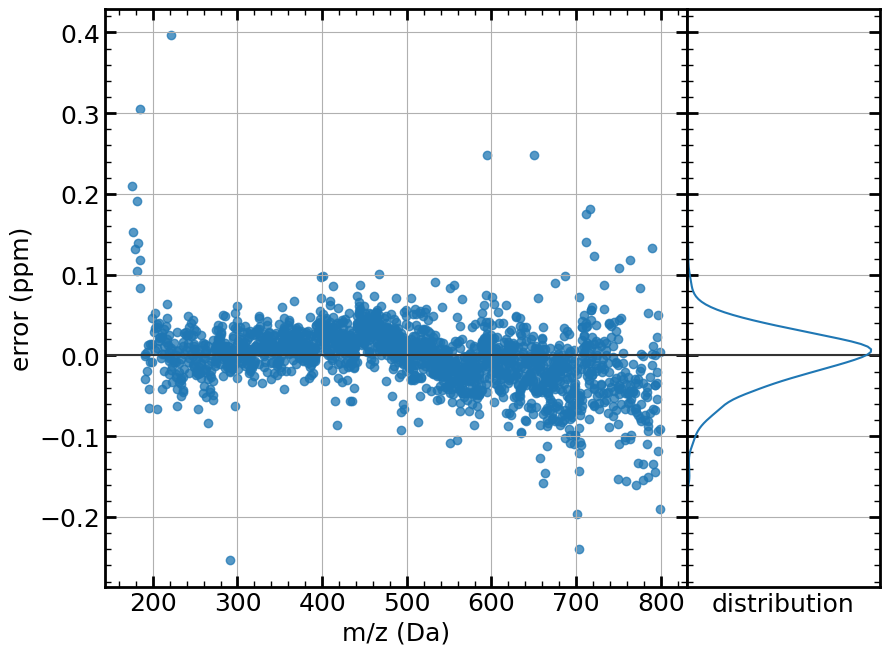

In [11]:
att_pl.plot.plot_error(distribution=True);

### Next steps

Now we will continue by adding several Kendrick series following the same steps.

After each calibration steps, Kendrick series are updated.

In [12]:
builder.display_kendrick_series()

In [13]:
builder.get_kendrick_series_candidates(10)

C   H  O  N  ion_exact_mass  nominal_mass   err_mDa   err_ppm  isotopic  \
0  18  19  4  0      299.128883           299  0.012664  0.042335     False   

      formula  
0  C18 H19 O4

As a first calibration was done, now, the `target_error` is zero.

In [15]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=10,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C18 H19 O4
Attributed kendrick series:
---------------------------
mz range:   299.1289   443.0831 err_ppm:    0.019 (+/-) 0.019
              mz  intensity  SN  error_ppm      formula
1868  299.128895   0.870165 NaN   0.042335   C18 H19 O4
1929  315.123806   1.367169 NaN   0.026753   C18 H19 O5
1992  331.118716   3.102588 NaN   0.013478   C18 H19 O6
2043  347.113627   5.191497 NaN   0.002192   C18 H19 O7
2117  363.108548   8.958874 NaN   0.020171   C18 H19 O8
2196  379.103460   6.130694 NaN   0.010955   C18 H19 O9
2265  395.098382   5.936790 NaN   0.028467  C18 H19 O10
2335  411.093284   3.904809 NaN  -0.003388  C18 H19 O11
2416  427.088196   2.452031 NaN  -0.008822  C18 H19 O12
2502  443.083138   1.302111 NaN   0.054444  C18 H19 O13
CALIBRATION SUMMARY
-------------------
 Number of data points        : 32
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: -6.75802e-11 B: 1.00000e+00
 Root mean squared e

/Users/gvallver/git/pyc2mc/src/pyc2mc/processing/caliblist_builder.py:343: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (170.01 -> 799.27) Da
calib. list: (275.13 -> 443.08) Da

  self._last_peaklist = recal.recalibrate(self._last_peaklist)


 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 1794
 Mean error (ppm)     : -0.02029
 Std error (ppm)      : 0.04738
 Attributed percentage: 43.5 %
 hits percentage      : 68.02 %
Update kendrick series
Done


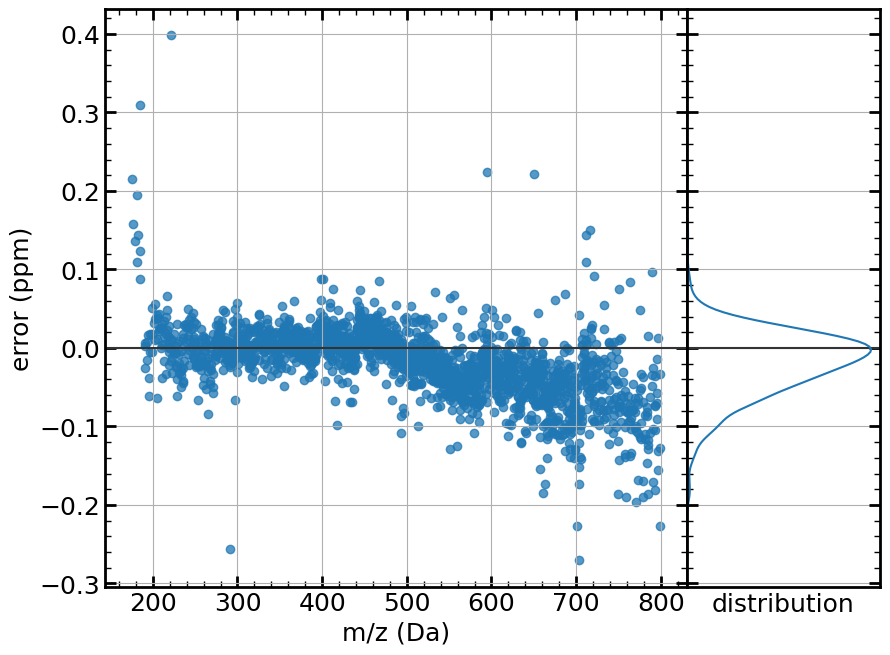

In [16]:
att_pl.plot.plot_error(distribution=True);

In [17]:
builder.display_kendrick_series()

In [20]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=78,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C30 H33 O10
Attributed kendrick series:
---------------------------
mz range:   553.2079   697.1621 err_ppm:   -0.054 (+/-) 0.028
              mz  intensity  SN  error_ppm      formula
3078  553.207890   0.926897 NaN  -0.055094  C30 H33 O10
3161  569.202814   1.714402 NaN  -0.037663  C30 H33 O11
3243  585.197708   3.190782 NaN  -0.072055  C30 H33 O12
3342  601.192662   3.663758 NaN  -0.004431  C30 H33 O13
3426  617.187576   4.159687 NaN  -0.004748  C30 H33 O14
3501  633.182451   3.980506 NaN  -0.067857  C30 H33 O15
3577  649.177366   3.535306 NaN  -0.065885  C30 H33 O16
3670  665.172261   2.551498 NaN  -0.093727  C30 H33 O17
3752  681.167196   2.293521 NaN  -0.061200  C30 H33 O18
3825  697.162102   1.030220 NaN  -0.072866  C30 H33 O19
CALIBRATION SUMMARY
-------------------
 Number of data points        : 46
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 1.87782e-10 B: 1.00000e+00
 Root mean squared e

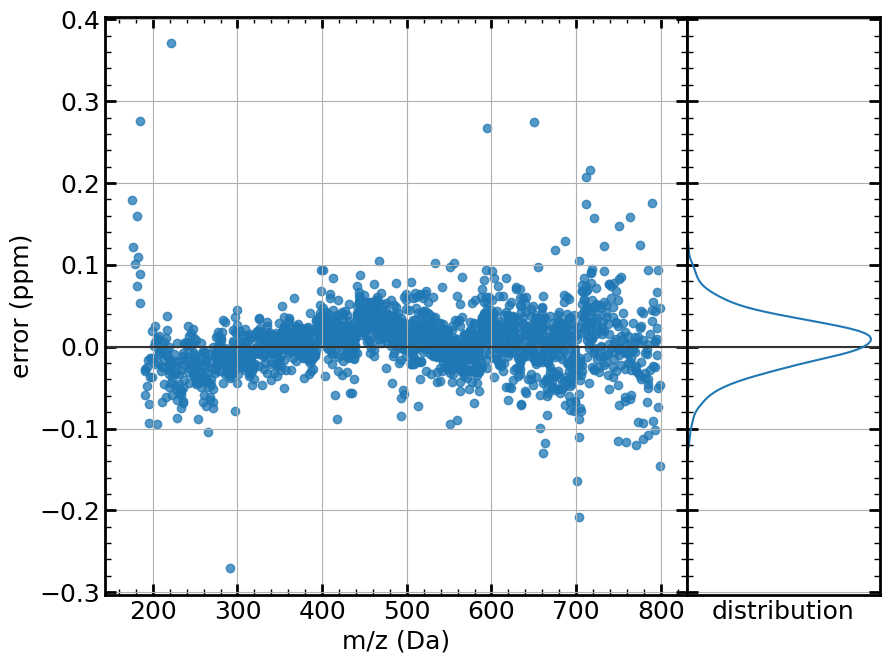

In [21]:
att_pl.plot.plot_error(distribution=True);

In [22]:
builder.display_kendrick_series()

In [23]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=2,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C11 H15 O4
Attributed kendrick series:
---------------------------
mz range:   211.0976   307.0671 err_ppm:   -0.025 (+/-) 0.013
              mz  intensity  SN  error_ppm      formula
1304  211.097577   1.874643 NaN  -0.025024   C11 H15 O4
1508  227.092486   1.504283 NaN  -0.048302   C11 H15 O5
1630  243.087405   2.570361 NaN  -0.026035   C11 H15 O6
1709  259.082325   7.926010 NaN  -0.005255   C11 H15 O7
1763  275.077235  14.190537 NaN  -0.022056   C11 H15 O8
1826  291.072145   3.775639 NaN  -0.035887   C11 H15 O9
1893  307.067066   1.269584 NaN  -0.014646  C11 H15 O10
CALIBRATION SUMMARY
-------------------
 Number of data points        : 58
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 2.20379e-11 B: 1.00000e+00
 Root mean squared error (ppm): 0.026735
 Calibration mz range         : 211.10, 697.16

Calibrating peaklist: recalibrated_delimited_noncalibrated_sample.pks
 4124 peaks (170.01 -> 799.27)

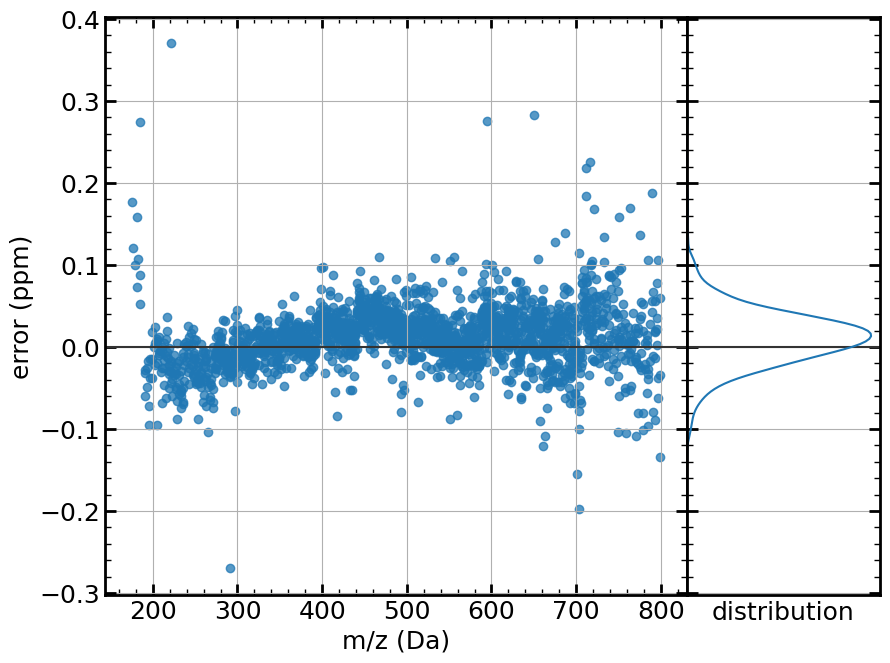

In [24]:
att_pl.plot.plot_error(distribution=True);

### Current calibration list

Before going further, take a look at the current calibration list in order to know
what is missing.

In [25]:
builder.calibration_list

CalibList (58 peaks) 211.10 -> 697.16
Calibration Point: 211.10 (C11 H15 O4)
Calibration Point: 227.09 (C11 H15 O5)
Calibration Point: 243.09 (C11 H15 O6)
Calibration Point: 259.08 (C11 H15 O7)
Calibration Point: 260.09 (C10 H15 O7 13C1)
Calibration Point: 275.08 (C11 H15 O8)
...
Calibration Point: 650.18 (C29 H33 O16 13C1)
Calibration Point: 665.17 (C30 H33 O17)
Calibration Point: 666.18 (C29 H33 O17 13C1)
Calibration Point: 681.17 (C30 H33 O18)
Calibration Point: 697.16 (C30 H33 O19)

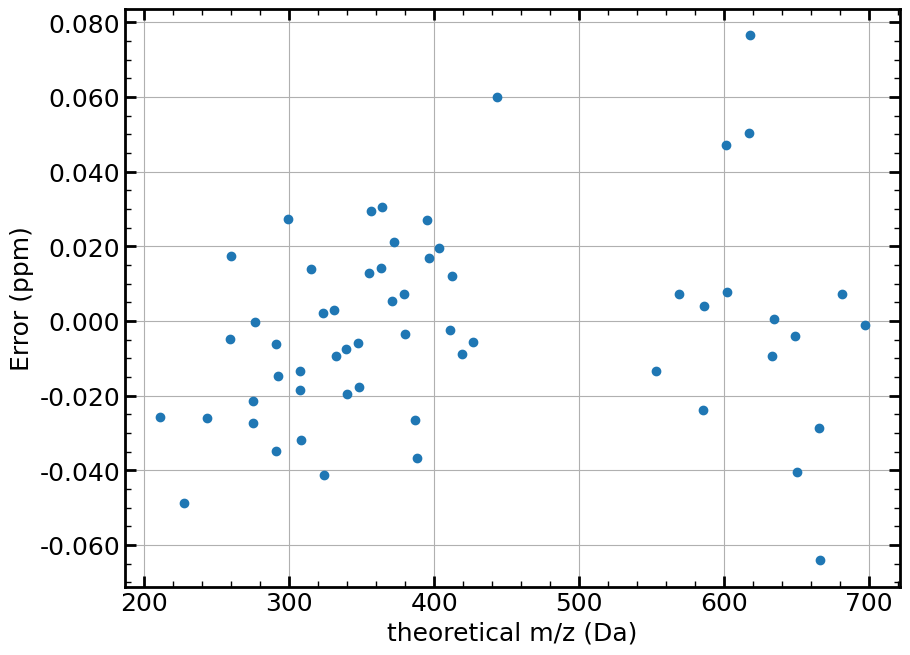

In [26]:
builder.calibration_list.plot.error_trend();

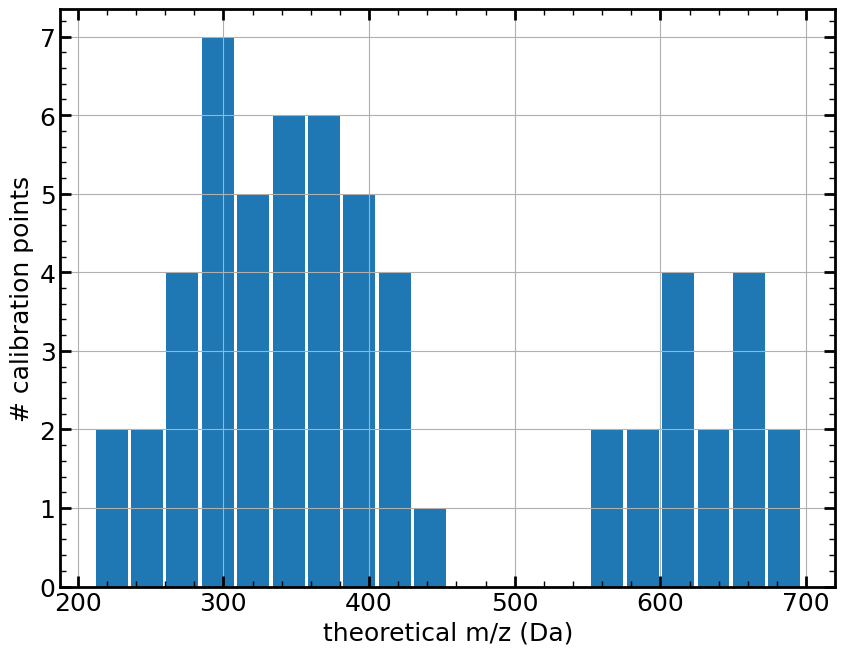

In [27]:
builder.calibration_list.plot.hist(bins=20)

Points are missing arround m/z of 500 Da. Let's look for a series in this range
and add it to the calibration list.

In [28]:
idx = builder.kendrick_series.get_series_in_range(mz_bounds=(480, 520))

  60   519.1508   10
  68   485.1453   10
  84   501.1614    9
 131   483.1297   10
 145   506.1385    8


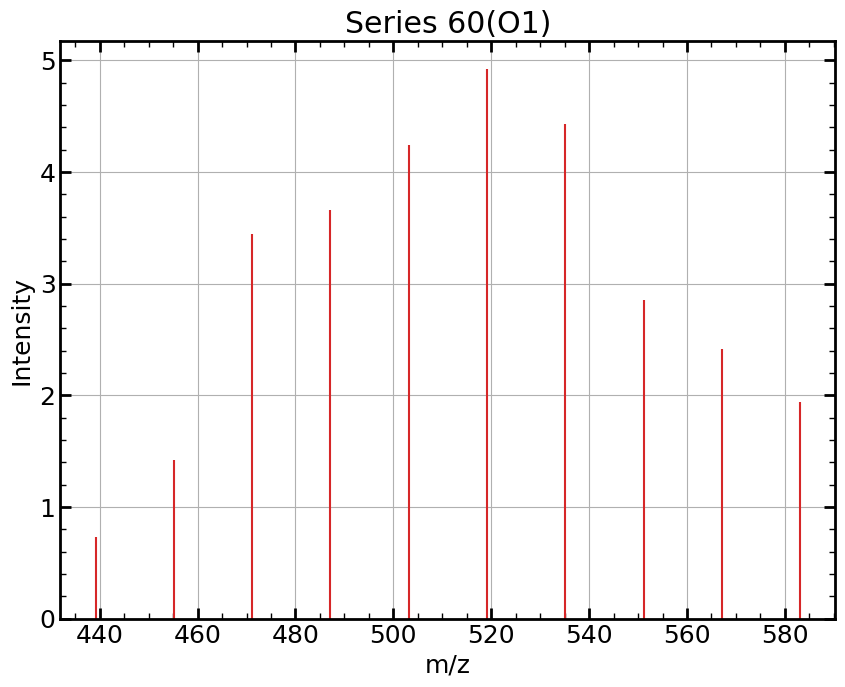

In [29]:
builder.kendrick_series[60].plot()

In [30]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=60,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C25 H27 O7
Attributed kendrick series:
---------------------------
mz range:   439.1762   583.1305 err_ppm:    0.012 (+/-) 0.023
              mz  intensity  SN  error_ppm      formula
2486  439.176237   0.727275 NaN   0.024241   C25 H27 O7
2570  455.171161   1.419874 NaN   0.043612   C25 H27 O8
2658  471.166075   3.445361 NaN   0.041163   C25 H27 O9
2738  487.160990   3.661061 NaN   0.039568  C25 H27 O10
2816  503.155885   4.243994 NaN  -0.001002  C25 H27 O11
2896  519.150800   4.926282 NaN   0.000104  C25 H27 O12
2976  535.145715   4.428954 NaN   0.001776  C25 H27 O13
3063  551.140621   2.855069 NaN  -0.014180  C25 H27 O14
3146  567.135528   2.416128 NaN  -0.028639  C25 H27 O15
3228  583.130464   1.941969 NaN   0.009722  C25 H27 O16
CALIBRATION SUMMARY
-------------------
 Number of data points        : 73
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 9.35906e-12 B: 1.00000e+00
 Root mean squared er

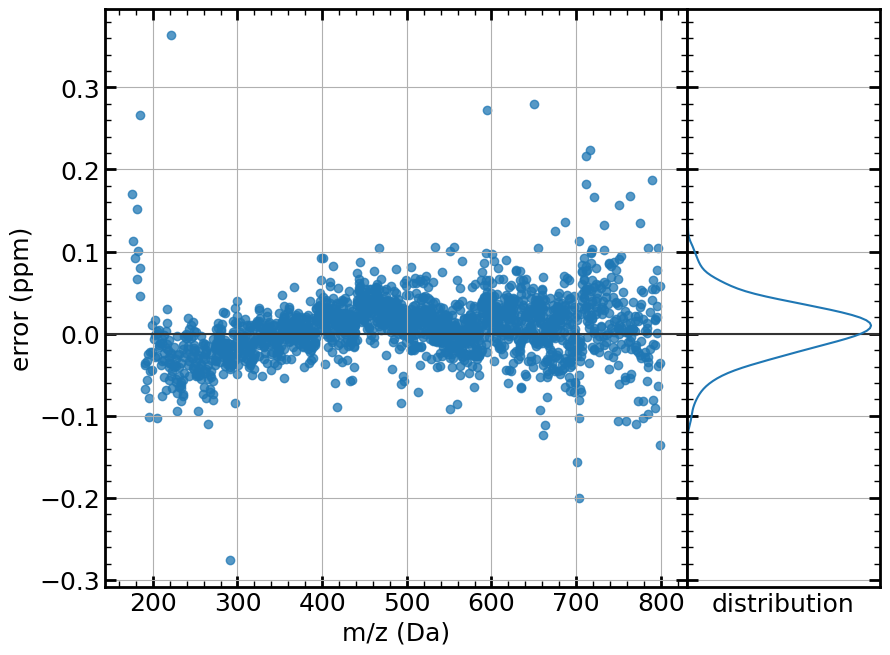

In [31]:
att_pl.plot.plot_error(distribution=True);

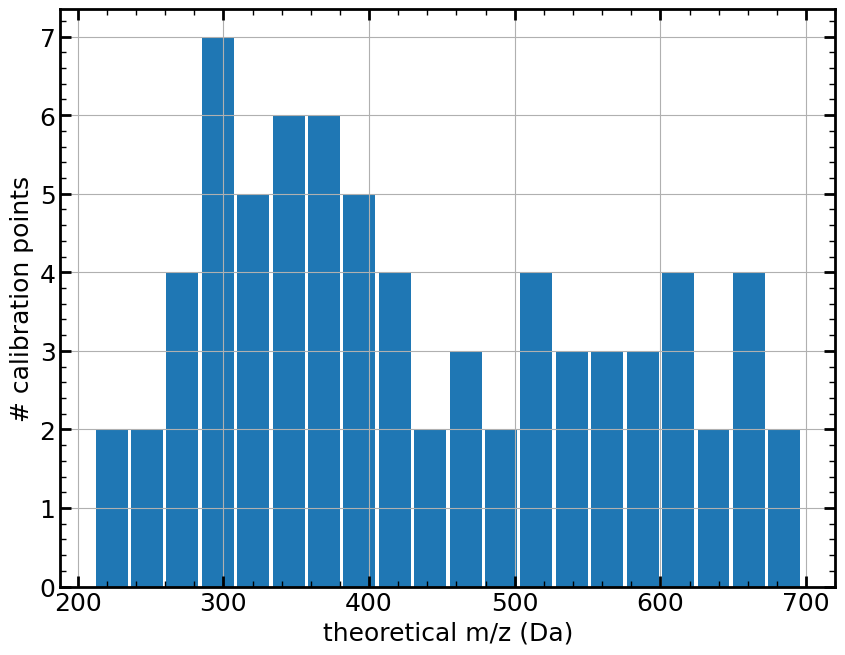

In [32]:
builder.calibration_list.plot.hist(bins=20)

### Continue with additional series

In [33]:
builder.display_kendrick_series()

In [34]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=36,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C13 H15 O3
Attributed kendrick series:
---------------------------
mz range:   219.1027   347.0620 err_ppm:   -0.026 (+/-) 0.019
              mz  intensity  SN  error_ppm      formula
1426  219.102660   0.819551 NaN  -0.035868   C13 H15 O3
1583  235.097569   1.389868 NaN  -0.056923   C13 H15 O4
1672  251.092489   2.526917 NaN  -0.034103   C13 H15 O5
1737  267.087398   5.086337 NaN  -0.050173   C13 H15 O6
1794  283.082319   6.313974 NaN  -0.027889   C13 H15 O7
1865  299.077239   5.982151 NaN  -0.006842   C13 H15 O8
1926  315.072150   3.952885 NaN  -0.018582   C13 H15 O9
1988  331.067071   2.069494 NaN   0.002054  C13 H15 O10
2040  347.061982   0.670188 NaN  -0.007037  C13 H15 O11
CALIBRATION SUMMARY
-------------------
 Number of data points        : 84
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: -1.78077e-11 B: 1.00000e+00
 Root mean squared error (ppm): 0.027716
 Calibration mz range         : 211

In [35]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=50,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C27 H29 O8
Attributed kendrick series:
---------------------------
mz range:   481.1868   641.1359 err_ppm:    0.011 (+/-) 0.032
              mz  intensity  SN  error_ppm      formula
2711  481.186793   0.722271 NaN   0.003560   C27 H29 O8
2793  497.181738   1.246360 NaN   0.063753   C27 H29 O9
2870  513.176613   2.147516 NaN  -0.015561  C27 H29 O10
2946  529.171538   3.554467 NaN   0.005038  C27 H29 O11
3022  545.166464   4.546630 NaN   0.025041  C27 H29 O12
3116  561.161360   5.354898 NaN  -0.008962  C27 H29 O13
3198  577.156286   4.197593 NaN   0.011478  C27 H29 O14
3284  593.151232   3.162245 NaN   0.065096  C27 H29 O15
3381  609.146109   1.513617 NaN   0.001532  C27 H29 O16
3464  625.141037   1.126805 NaN   0.021736  C27 H29 O17
3538  641.135904   0.740701 NaN  -0.052130  C27 H29 O18
CALIBRATION SUMMARY
-------------------
 Number of data points        : 100
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model  

In [36]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=18,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C21 H23 O5
Attributed kendrick series:
---------------------------
mz range:   355.1551   515.1042 err_ppm:    0.004 (+/-) 0.026
              mz  intensity  SN  error_ppm      formula
2082  355.155079   0.742377 NaN  -0.051093   C21 H23 O5
2160  371.150011   0.942065 NaN  -0.002145   C21 H23 O6
2235  387.144934   2.508984 NaN   0.017796   C21 H23 O7
2301  403.139846   4.580032 NaN   0.012183   C21 H23 O8
2376  419.134759   7.198064 NaN   0.007799   C21 H23 O9
2463  435.129672   7.910070 NaN   0.004509  C21 H23 O10
2545  451.124606   6.586112 NaN   0.046530  C21 H23 O11
2632  467.119510   6.591965 NaN   0.022169  C21 H23 O12
2716  483.114424   3.216867 NaN   0.020815  C21 H23 O13
2799  499.109329   1.707880 NaN   0.000185  C21 H23 O14
2873  515.104224   0.873814 NaN  -0.037926  C21 H23 O15
CALIBRATION SUMMARY
-------------------
 Number of data points        : 117
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model  

In [37]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=126,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C35 H37 O11
Attributed kendrick series:
---------------------------
mz range:   633.2341   777.1884 err_ppm:   -0.003 (+/-) 0.028
              mz  intensity  SN  error_ppm      formula
3505  633.234125   0.705546 NaN  -0.017024  C35 H37 O11
3581  649.229023   1.213899 NaN  -0.042440  C35 H37 O12
3674  665.223941   1.911674 NaN  -0.036060  C35 H37 O13
3755  681.218889   2.041558 NaN   0.014555  C35 H37 O14
3828  697.213778   1.855644 NaN  -0.022723  C35 H37 O15
3904  713.208747   2.399622 NaN   0.054314  C35 H37 O16
3958  729.203627   1.945775 NaN   0.005013  C35 H37 O17
4000  745.198547   1.455660 NaN   0.011959  C35 H37 O18
4038  761.193467   1.158387 NaN   0.019057  C35 H37 O19
4069  777.188358   0.933445 NaN  -0.012302  C35 H37 O20
CALIBRATION SUMMARY
-------------------
 Number of data points        : 132
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: -1.57329e-11 B: 1.00000e+00
 Root mean squared

In [38]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=124,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C35 H41 O13
Attributed kendrick series:
---------------------------
mz range:   669.2553   797.2146 err_ppm:   -0.009 (+/-) 0.031
              mz  intensity  SN  error_ppm      formula
3698  669.255274   0.691520 NaN   0.012962  C35 H41 O13
3775  685.250152   0.853422 NaN  -0.040209  C35 H41 O14
3848  701.245071   1.193605 NaN  -0.033441  C35 H41 O15
3925  717.240030   1.312083 NaN   0.029254  C35 H41 O16
3971  733.234939   2.410965 NaN   0.021473  C35 H41 O17
4012  749.229859   1.460164 NaN   0.027812  C35 H41 O18
4048  765.224709   1.796599 NaN  -0.057159  C35 H41 O19
4080  781.219639   0.910224 NaN  -0.035824  C35 H41 O20
4116  797.214580   1.152003 NaN  -0.002387  C35 H41 O21
CALIBRATION SUMMARY
-------------------
 Number of data points        : 141
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 1.10645e-11 B: 1.00000e+00
 Root mean squared error (ppm): 0.029232
 Calibration mz range         : 21

In [39]:
att_pl = builder.calibrate_from_kendricks_series(
    ks_idx=19,
    formula_grid=fg,
    target_error=0,
    lambda_parameter=1,
    add_isotopes=True,
    recalib_kws=dict(model=2, fit_intercept=False),
    attrib_kws=dict(lambda_parameter=0.5)
)

selected candidate for lowest m/z: C21 H25 O6
Attributed kendrick series:
---------------------------
mz range:   373.1657   517.1199 err_ppm:    0.012 (+/-) 0.018
              mz  intensity  SN  error_ppm      formula
2174  373.165662   0.709989 NaN   0.000801   C21 H25 O6
2245  389.160585   1.640040 NaN   0.020586   C21 H25 O7
2312  405.155507   2.079772 NaN   0.039639   C21 H25 O8
2388  421.150410   5.128223 NaN   0.010552   C21 H25 O9
2473  437.145314   5.921387 NaN  -0.015638  C21 H25 O10
2556  453.140247   7.065498 NaN   0.026967  C21 H25 O11
2645  469.135161   7.637933 NaN   0.024751  C21 H25 O12
2725  485.130076   4.182543 NaN   0.023373  C21 H25 O13
2808  501.124980   2.235473 NaN   0.002798  C21 H25 O14
2885  517.119885   0.914563 NaN  -0.015854  C21 H25 O15
CALIBRATION SUMMARY
-------------------
 Number of data points        : 157
 Regression model             : RecalibrationModels.quadratic
 Parameters of the model      : A: 7.52605e-12 B: 1.00000e+00
 Root mean squared e

In [40]:
builder.display_kendrick_series()

In [41]:
idx = builder.kendrick_series.get_series_in_range((700, 850))

  99   701.2087    9
 103   707.2193    7
 123   727.2244    8
 124   733.2349    9
 126   713.2087   10
 129   731.2193    8
 133   725.2299    8
 136   709.2138    8
 142   705.2400    9
 143   705.2188    8
 146   713.2298    7
 150   755.2193    7
 151   729.2400    8
 154   735.2294    7
 157   741.2400    8
 158   767.2404    7


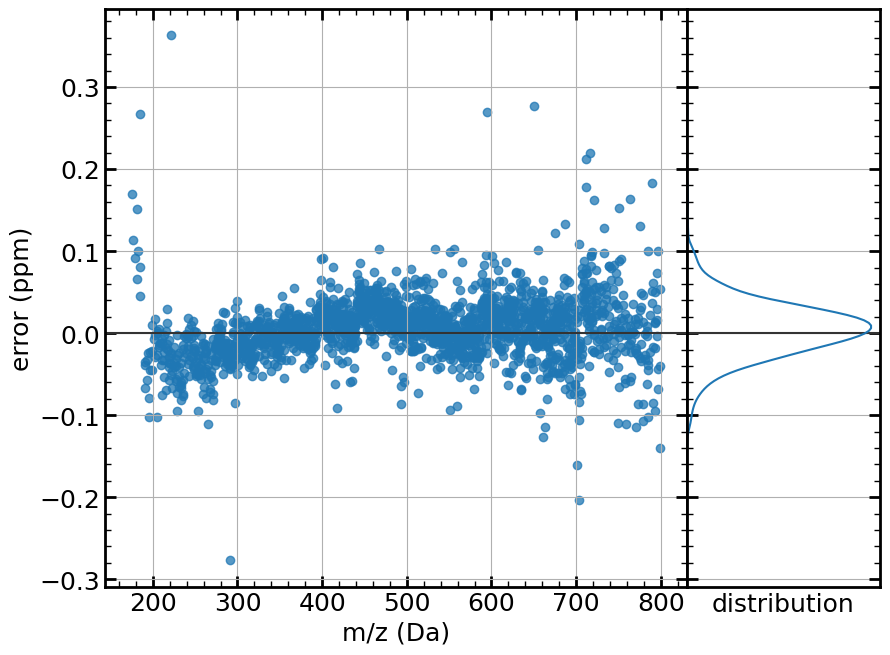

In [42]:
att_pl.plot.plot_error(distribution=True);

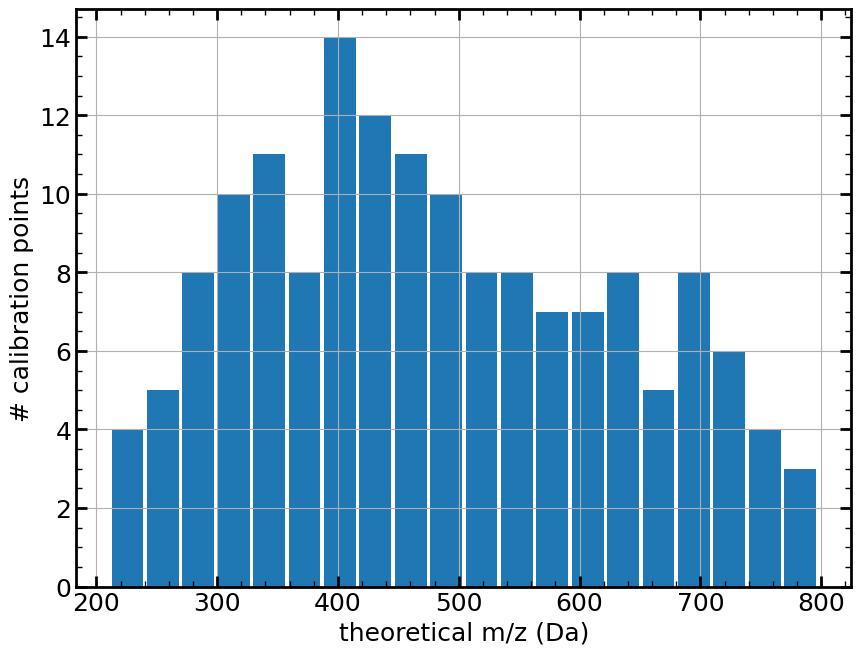

In [43]:
builder.calibration_list.plot.hist(bins=20)

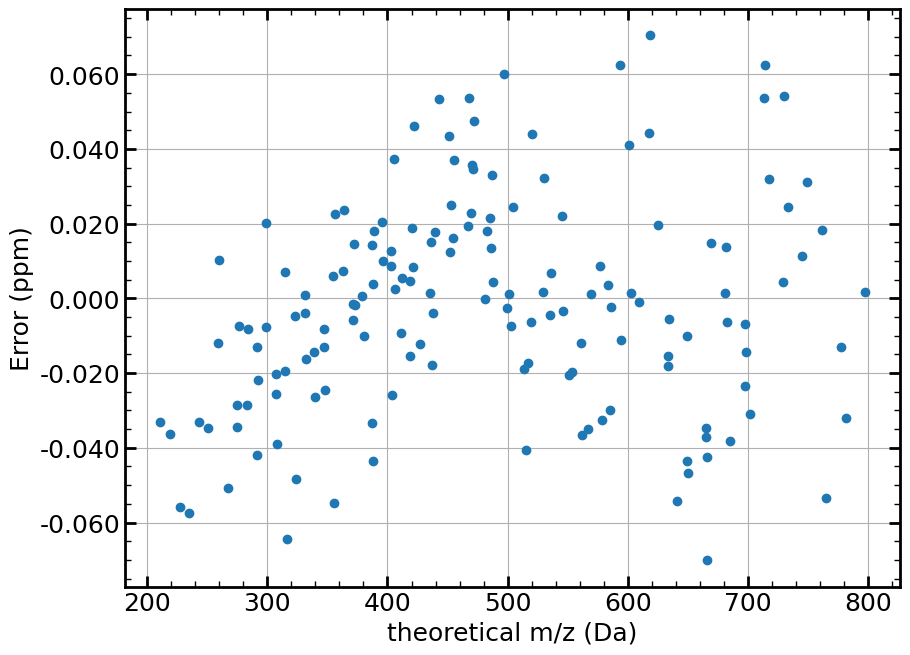

In [44]:
builder.calibration_list.plot.error_trend()

In [45]:
builder.calibration_list.to_csv()

## Step walking

In [46]:
from pyc2mc.io.caliblist import read_caliblist

In [47]:
cl = read_caliblist("calib_list.csv")

In [48]:
wrecal = WalkingCalibration(
    calibration_list=builder.calibration_list,
    segment_size=180,
    model=2,
    fit_intercept=False,
    verbose=True,
)
recal_pl = wrecal.recalibrate(builder.recalibrated_peaklist)

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.quadratic
# segments      : 3

Segment   0: 211.10 -> 406.47 (195.37)
    Calibrated: True
    # points  : 58
    Parameters: A: -2.43920e-10 B: 1.00000e+00
    RMSE (ppm): 0.020024

Segment   1: 406.47 -> 601.84 (195.37)
    Calibrated: True
    # points  : 61
    Parameters: A: 1.21337e-10 B: 1.00000e+00
    RMSE (ppm): 0.024543

Segment   2: 601.84 -> 797.22 (195.37)
    Calibrated: True
    # points  : 38
    Parameters: A: -6.06766e-11 B: 1.00000e+00
    RMSE (ppm): 0.034942

Calibrating peaklist: recalibrated_delimited_noncalibrated_sample.pks
     4124 peaks (170.01 -> 799.27) Da
1311 peaks are out of the calibration list range.
mz range before calib. list: 41.09
mz range above calib. list : 2.05


Set up an extended formula grid with carbon isotopes.

In [49]:
fg1 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O"],
    limits=[[1, 100], [1, 300], [0, 30]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)

In [50]:
att_pl = lowest_error_attribution(
    recal_pl,
    formula_grid=fg1, 
    lambda_parameter=0.2,
    use_isotopes=True,
)
att_pl.summary()

 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 2412
 Mean error (ppm)     : 0.00762
 Std error (ppm)      : 0.03545
 Attributed percentage: 58.49 %
 hits percentage      : 78.47 %


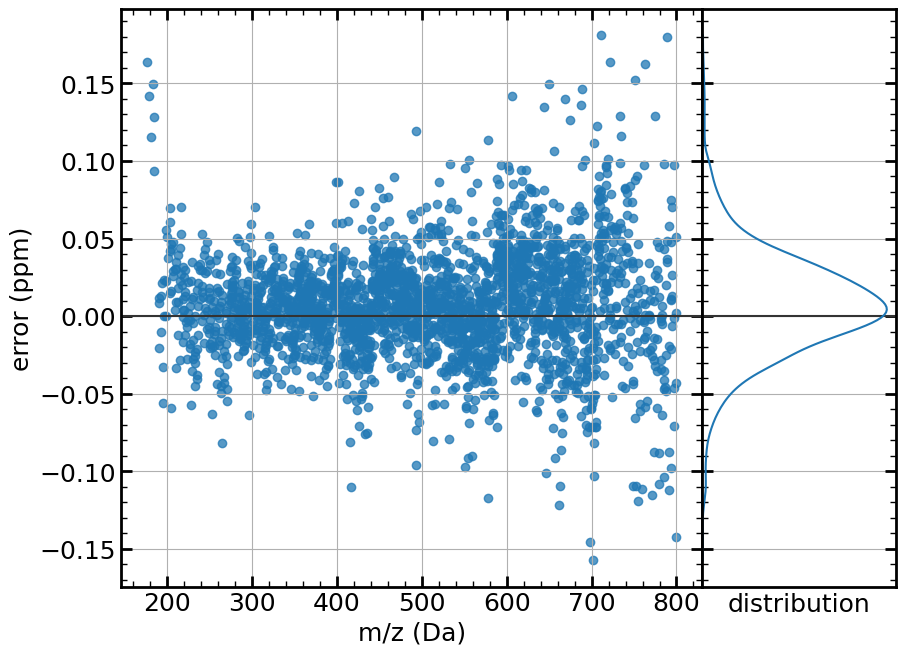

In [52]:
att_pl.plot.plot_error(distribution=True);

### Final attribution

In [53]:
# from there, I define two formula grid and I will attribute iteratively 
# with the first one and the second one.
fg1 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O"],
    limits=[[1, 100], [1, 300], [0, 30]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg2 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O"],
    limits=[[1, 100], [1, 300], [0, 30]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (8, 18): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg3 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (7, 15): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg4 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N", "Na"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg5 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "B"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (5, 10): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg6 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N", "S", "Na"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5], [0, 2], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)

In [54]:
print(fg1)
att_pl = lowest_error_attribution(recal_pl, fg1, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg2)
att_pl = lowest_error_attribution(att_pl, fg2, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg3)
att_pl = lowest_error_attribution(att_pl, fg3, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg4)
att_pl = lowest_error_attribution(att_pl, fg4, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg5)
att_pl = lowest_error_attribution(att_pl, fg5, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg6)
att_pl = lowest_error_attribution(att_pl, fg6, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()

FormulaGrid: FormulaGrid_0            
   Elements: ['C', 'H', 'O']            
   Elemental Limits: [[1, 100], [1, 300], [0, 30]]            
   Polarity: -1            
   Mass bounds: [120, 1200]            
   H/C ratio bounds: [0.2, 3]            
   DBE bounds: [0, 35]            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2}            
   Combine isotopes: []
 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 2412
 Mean error (ppm)     : 0.00762
 Std error (ppm)      : 0.03545
 Attributed percentage: 58.49 %
 hits percentage      : 78.47 %
FormulaGrid: FormulaGrid_0            
   Elements: ['C', 'H', 'O']            
   Elemental Limits: [[1, 100], [1, 300], [0, 30]]            
   Polarity: -1            
   Mass bounds: [120, 1200]            
   H/C ratio bounds: [0.2, 3]            
   DBE bounds: [0, 35]            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2, (8, 18): 1}            
   Combine isotopes: []
 Attribu

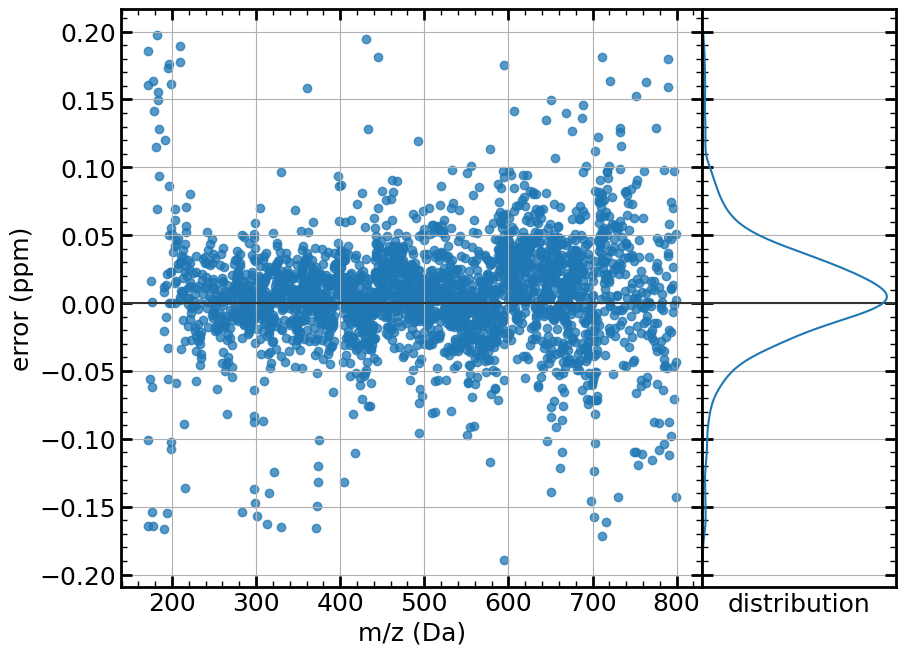

In [55]:
att_pl.plot.plot_error(distribution=True);

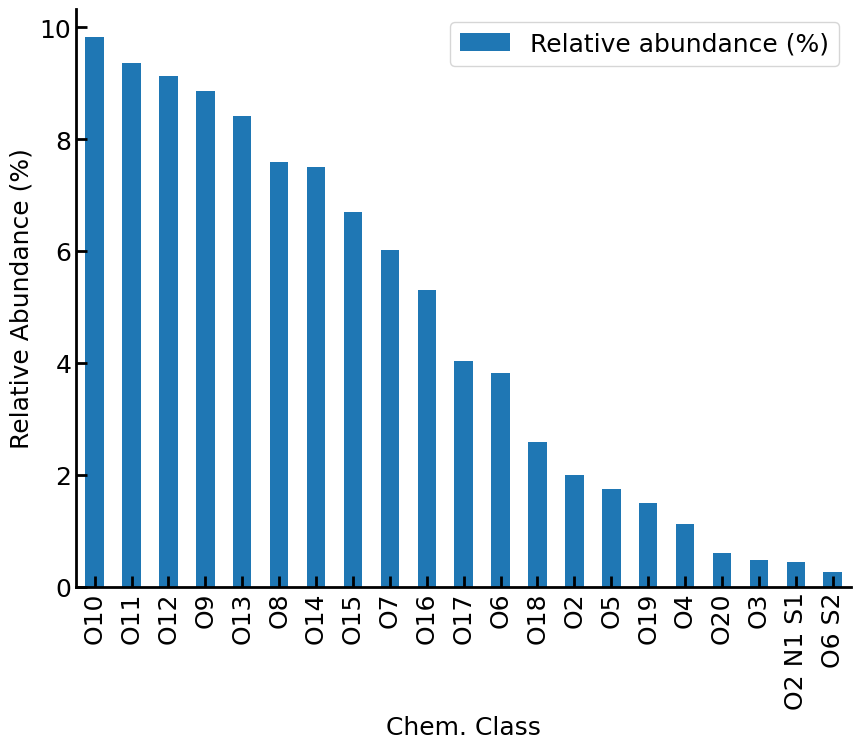

In [56]:
att_pl.plot.plot_classes(threshold=.25)

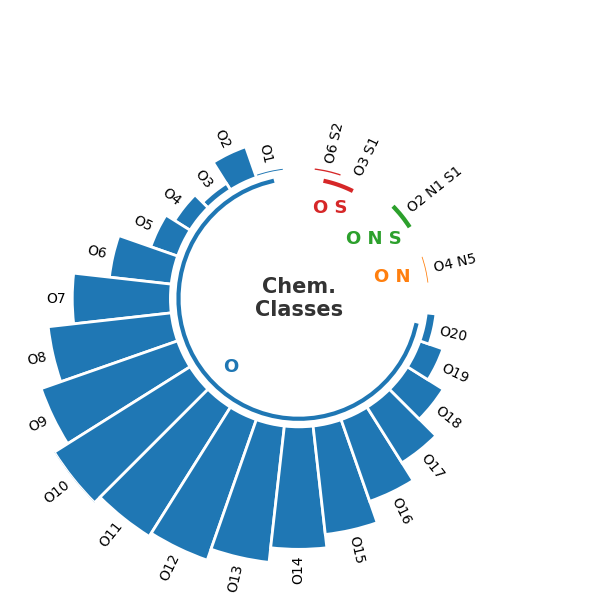

In [65]:
att_pl.plot.plot_classes_circular(cum_threshold=98)

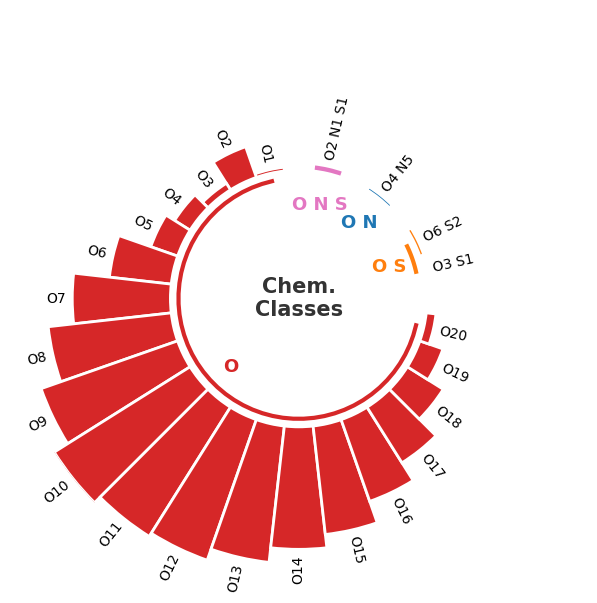

In [66]:
att_pl.plot.plot_classes_circular(
    cum_threshold=98,
    group_order=["O", "O S", "O N", "O N S"],
    group_colors=["C3", "C1", "C0", "C6"])